# H-Strategy

## Introduction

This notebook demonstrates an implementation of the strategy described in [Bogomolov, T. (2013). Pairs trading based on statistical variability of the spread process.](https://www.researchgate.net/publication/263339291_Pairs_trading_based_on_statistical_variability_of_the_spread_process)

In this paper, the author proposes a new nonparametric approach to pairs trading based on the idea of Renko and Kagi charts. This approach exploits statistical information about the variability of the tradable process. The approach does not aim to find a long-run mean of the process and trade towards it like other methods of pairs trading. Instead, it manages the problem of how far the process should move in one direction before trading in the opposite direction becomes potentially profitable by measure the variability of the process.

## H-construction

Suppose $P(t)$ is a continuous time series on the time interval $[0, T]$.

### Renko construction

#### Step 1: Generate the Renko Process
The Renko process $X(i)$ is defined as,

$X(i) : X(i) = P(\tau_i)$, $i = 0, 1, ..., N$,

where $\tau_i$, $i = 0, 1, ..., N$ is an increasing sequence of time moments such that for some arbitrary $H > 0$, $\tau_0 = 0$ and $P(\tau_0) = P(0)$,

$H \leq \max \limits_{t \in [0,T]} P(t) - \min \limits_{t \in [0,T]} P(t)$,

$\tau_i = inf\{u \in [\tau_{i - 1}, T] : |P(u) − P(\tau_{i - 1})| = H\}$.

#### Step 2: Determine Turning Points

We create another sequence of time moments $\{(\tau^a_n, \tau^b_n), n = 0, 1, ..., M\}$ based on the
sequence ${\tau_i}$. The sequence $\{\tau^a_n\}$ defines time moments when the renko process $X(i)$ has a local
maximum or minimum, that is the process $X(i) = P(\tau_i)$ changes its direction, and the sequence
$\{\tau^b_n\}$ defines the time moments when the local maximum or minimum is detected.

More precisely, when take $\tau^a_0 = \tau_0$ and $\tau^b_0 = \tau_1$ then

$\tau^b_n = min\{\tau_i > \tau^b_{n-1}: (P(\tau_i) − P(\tau_{i-1}))(P(\tau_{i-1}) − P(\tau_{i-2})) < 0\}$, 

$\tau^a_n = \{\tau_{i - 1} : \tau^b_n = \tau_i\}$.

### Kagi construction

The Kagi construction is similar to the Renko construction with the only difference being that to create the sequence of time moments $\{(\tau^a_n, \tau^b_n), n = 0, 1, ..., M\}$ for the Kagi construction we use local maximums and minimums of the process $P(t)$ rather than the process $X(i)$ derived from it.

The sequence $\{\tau^a_n\}$ then defines the time moments when the price process $P(t)$ has a local maximum or minimum and the sequence $\{\tau^b_n\}$ defines the time moments when that local maximum or minimum is recognized, that is, the time when the process $P(t)$ moves away from its last local maximum or minimum by a distance equal to $H$.

More precisely, $\tau^a_0$, $\tau^b_0$ and $S_0$ is defined as,

$\tau^b_0 = inf\{u \in [0, T] : \max \limits_{t \in [0,u]} P(t) − \min \limits_{t \in [0,u]} P(t) = H\}$,

$\tau^a_0 = inf\{u < \tau^b_0: |P(u) − P(\tau^b_0)| = H\}$,

$S_0 = sign(P(\tau^a_0) − P(\tau^b_0))$,

where $S_0$ can take two values: $1$ for a local maximum and $−1$ for a local minimum.

Then we define $(\tau^a_n, \tau^b_n)$, $n > 0$ recursively. The construction of the full sequence $\{(\tau^a_n, \tau^b_n), n = 0, 1, ..., M\}$ is done inductively by alternating the following cases.

$Case\ 1: \ \ S_{n-1} = -1$

if $S_{n-1} = -1$, then $\tau^a_n, \tau^b_n$ and $S_n$ is defined as,

$\tau^b_n = inf\{u \in [\tau^a_{n-1}, T] : P(u) − \min \limits_{t \in [\tau^a_{n-1}\ \ ,\ u]} P(t) = H\}$,

$\tau^a_n = inf\{u < \tau^b_n: P(u) = \min \limits_{t \in [\tau^a_{n-1}\ \ ,\ \tau^b_n]} P(t)\}$,

$S_n = 1$.


$Case\ 2: \ \ S_{n-1} = 1$

if $S_{n-1} = 1$, then $\tau^a_n, \tau^b_n$ and $S_n$ is defined as,

$\tau^b_n = inf\{u \in [\tau^a_{n-1}, T] : \max \limits_{t \in [\tau^a_{n-1}\ \ ,\ u]} P(t) - P(u) = H\}$,

$\tau^a_n = inf\{u < \tau^b_n: P(u) = \max \limits_{t \in [\tau^a_{n-1}\ \ ,\ \tau^b_n]} P(t)\}$,

$S_n = -1$.

## H-statistics

### H-inversion

H-inversion counts the number of times the process $P(t)$ changes its direction for selected $H$, $T$ and $P(t)$. It is given by

$N_T (H, P) = \max \{n : \tau^{b}_{n} = T\} = N$,

where $H$ denotes the threshold of the H-construction, and $P$ dnotes the process $P(t)$.

### H-distances

H-distances counts the sum of vertical distances between local maximums and minimums to the power $p$. It is given by

$V^p_T (H, P) = \sum_{n = 1}^{N}|P(\tau^a_n) − P(\tau^a_{n−1})|^p$.

### H-volatility

H-volatility of order p measures the variability of the process $P(t)$ for selected $H$ and $T$. It is given by

$\xi^p_T = {V^p_T (H, P)}/{N_T (H, P)}$.

## Strategies

### Momentum Strategy

The investor buys (sells) an asset at a stopping time $\tau^b_n$ when he or she recognizes that the process passed its previous local minimum
(maximum) and the investor expects a continuation of the movement. The signal $s_t$ is given by

$s_t = \left\{\begin{array}{l}
+1,\ if\ t = \tau^b_n\ and\ P(\tau^b_n) - P(\tau^a_n) > 0\\
-1,\ if\ t = \tau^b_n\ and\ P(\tau^b_n) - P(\tau^a_n) < 0\\
0,\ otherwise
\end{array}\right.$

where $+1$ indicates $opening\ a\ long\ trade\ or\ closing\ a\ short\ trade$, $-1$ indicates $opening\ a\ short\ trade\ or\ closing\ a\ long\ trade$ and $0$ indicates $holding\ the\ previous\ position$.

The profit from one trade according to the momentum H-strategy over time from $\tau^b_{n−1}$ to $\tau^b_{n}$ is

$Y_{\tau^b_n} = (P(\tau^b_n) − P(\tau^b_{n−1})) · sign(P(\tau^a_n) − P(\tau^a_{n−1}))$

and the total profit from time $0$ till time $T$ is

$Y_T(H, P) = (\xi^1_T (H, P) − 2H) \cdot N_T (H, P)$

### Contrarian Strategy

The investor sells (buys) an asset at a stopping time $\tau^b_n$ when he or she decides that the process has passed far enough from its previous local minimum
(maximum), and the investor expects a movement reversion. The signal $s_t$ is given by

$s_t = \left\{\begin{array}{l}
+1,\ if\ t = \tau^b_n\ and\ P(\tau^b_n) - P(\tau^a_n) < 0\\
-1,\ if\ t = \tau^b_n\ and\ P(\tau^b_n) - P(\tau^a_n) > 0\\
0,\ otherwise
\end{array}\right.$

where $+1$ indicates $opening\ a\ long\ trade\ or\ closing\ a\ short\ trade$, $-1$ indicates $opening\ a\ short\ trade\ or\ closing\ a\ long\ trade$ and $0$ indicates $holding\ the\ previous\ position$.

The profit from one trade according to the momentum H-strategy over time from $\tau^b_{n−1}$ to $\tau^b_{n}$ is

$Y_{\tau^b_n} = (P(\tau^b_n) − P(\tau^b_{n−1})) · sign(P(\tau^a_{n−1}) - P(\tau^a_n))$,

and the total profit from time $0$ till time $T$ is

$Y_T(H, P) = (2H - \xi^1_T (H, P)) \cdot N_T (H, P)$.

### Properties

It is clear that the choice of H-strategy depends on the value of H-volatility. if $\xi^1_T > 2H$, then to achieve a positive profit the investor should
employ a momentum H -strategy; if $\xi^1_T < 2H$ then the investor should use a contrarian H-strategy.

Suppose $P(t)$ follows the Wiener process, the H-volatility $\xi^1_T = 2H$. As a result, it is impossible to profit from the trading on the process $P(t)$. We can also see that H-volatility $\xi^1_T = 2H$ is a property of a martingale. Likewise $\xi^1_T > 2H$ could be a property of a sub-martingale or a super-martingale or a process regularly switching over time from a sub-martingale to a super-martingale and back.

In this paper, the author propose that for any mean-reverting process, regardless of its distribution, the H-volatility is less than $2H$. Hence, theoretically, trading the mean-reverting process by the contrarian H-strategy is profitable for any choice of $H$.

## Pairs Selection
- Purpose: Select trading pairs from the assets pool by using the properties of the H-construction.
- Algorithm:
    - Determine the assets pool and the length of historical data.
    - Take log-prices of all assets based on the history, combine them in all possible pairs and build spread process for each pair.
        - $spread_{ij} = log(P_i) - log(P_j)$
    - For each spread process, calculate its standard deviation, and set it as the threshold of the H-construction.
    - Determine the construction type of the H-construction.
        - It could be either Renko or Kagi.
    - Build the H-construction on the spread series formed by each possible pairs.
    - The top N pairs with the highest/lowest H-inversion are used for pairs trading.
        - Mean-reverting process tends to have higher H-inversion.

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from arbitragelab.time_series_approach.h_strategy import HConstruction
from arbitragelab.time_series_approach.h_strategy import HSelection

## Pairs Trading Backtesting Example

### Pairs Selection
- Frequency: Reselect every six months.
- H-selection parameters: 
    - Assets pool: S&P 500 Components, updated at the beginning of each year.
    - The length of historical data: 12-month history.
    - Construction type: Kagi
    - Selection: The top 5 pairs with the highest H-inversion.
    
### Trading Strategy
- Construction type: Kagi
- Signals type: contrarian.
- Trading period: Start trading all pairs from the first day of the trading period and constantly stay in the market for up to six months.

### Others
- Backtesting interval: 2005/01/01 ~ 2011/01/01
- Transaction costs: 0.1% per trade, which means about 0.2% per trade for the pair and about 0.4% per round trip for the pair.

In [2]:
# Getting the date of the first day of each quarter
dates = pd.date_range("2004-01-01", "2011-01-01", freq = "QS")

# Setting parameters for getting training and testing intervals
interval = 4
overlap = 2

train_date = []
test_date = []

# Determining training and testing intervals
i = 0
while i < len(dates) - interval - overlap:
    trd = (dates[i].date(), dates[i + interval].date())
    tsd = (dates[i + interval].date(), dates[i + interval + overlap].date())
    
    train_date.append(trd)
    test_date.append(tsd)
    
    i += 2
    
# Printing out some of the training and testing intervals
for train, test in zip(train_date[:5], test_date[:5]):
    print("Training:", train[0], "~", train[1], "Testing:", test[0], "~", test[1])

Training: 2004-01-01 ~ 2005-01-01 Testing: 2005-01-01 ~ 2005-07-01
Training: 2004-07-01 ~ 2005-07-01 Testing: 2005-07-01 ~ 2006-01-01
Training: 2005-01-01 ~ 2006-01-01 Testing: 2006-01-01 ~ 2006-07-01
Training: 2005-07-01 ~ 2006-07-01 Testing: 2006-07-01 ~ 2007-01-01
Training: 2006-01-01 ~ 2007-01-01 Testing: 2007-01-01 ~ 2007-07-01


In [3]:
# Getting data path
root_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_1 = os.path.join(root_path, "Sample-Data", "S&P 500_Components.csv")
path_2 = os.path.join(root_path, "Sample-Data", "S&P 500_Close_Data.csv")

In [4]:
# Reading data
components = pd.read_csv(path_1, index_col = 0)
data_df = pd.read_csv(path_2, index_col = 0)
data_df.index = pd.to_datetime(data_df.index)
tickers_with_data = list(data_df.columns)

In [5]:
# Setting parameters
construction_type = "Kagi"
signals_type = "contrarian"
selection_method = "highest"
transaction_costs = 0.001

# Creating series for storing backtesting results
total_returns = pd.Series(1, index = [test_date[0][0]], dtype = float)
total_returns_with_costs = pd.Series(1, index = [test_date[0][0]], dtype = float)
total_returns.index = pd.to_datetime(total_returns.index)
total_returns_with_costs.index = pd.to_datetime(total_returns_with_costs.index)

# Starting backtesting
for train, test in zip(train_date, test_date):
    train_year = str(train[0].year) # Getting the year of the start of the training interval
    tickers = list(components[train_year].dropna()) # Getting S&P 500 components for the year
    valid_tickers = list(set(tickers_with_data) & set(tickers)) # Determining which Tickers have historical data
    
    train_data = data_df[valid_tickers][train[0] : train[1]] # Getting required data for pairs selection
    train_data = train_data.dropna(how = "all", axis = 0).dropna(how = "all", axis = 1)
    
    # Getting pairs for trading
    minimum_length = len(train_data)*0.8
    hs = HSelection(train_data, construction_type)
    hs.select(minimum_length = minimum_length)
    pairs = hs.get_pairs(5, selection_method, False)
    
    # Creating lists for storing cumulative returns in the test interval for each pair
    returns_series_list = []
    returns_series_with_costs_list = []
    
    print("Training:", train[0], "~", train[1])
    print("Testing:", test[0], "~", test[1])
    
    # Calculating the cumulative returns in the test interval for each pair
    for i in pairs:
        threshold = i[1] # Getting the threshold of the H-construction
        pair_tickers = list(i[2])
        pair_data = data_df[pair_tickers][test[0] : test[1]] # Getting required data for backtesting
        pair_data = pair_data.dropna(axis = 0).dropna(axis = 1)
        
        if len(pair_data.columns) < 2:
            print("data error")
            continue
        
        series = np.log(pair_data[pair_tickers[0]]) - np.log(pair_data[pair_tickers[1]]) # Constructing spread series
        hc = HConstruction(series, threshold, construction_type) # Creating a class object
        signals = hc.get_signals(signals_type) # Getting the signals in the test interval
        trade_actions = signals[signals != 0] # Getting the actual trade actions (+1 for Open a long trade, -1 for Open a short trade)
        trade_dates_interval = [(trade_actions.index[i].date(), trade_actions.index[i + 1].date()) for i in range(len(trade_actions) - 1)] # Getting the intervals between two adjacent trade actions
        if len(trade_actions) > 0 and trade_actions.index[-1].date() < test[1]:
            trade_dates_interval.append([trade_actions.index[-1].date(), test[1]])
            
        # Creating series for storing cumulative returns
        returns_series = pd.Series(1, index = [test[0]], dtype = float)
        returns_series.index = pd.to_datetime(returns_series.index)
        returns_series_with_costs = pd.Series(1, index = [test[0]], dtype = float)
        returns_series_with_costs.index = pd.to_datetime(returns_series_with_costs.index)
        
        # Calculating the cumulative returns for each interval between two adjacent trade actions, then connecting them together
        for i, j in zip(trade_dates_interval, trade_actions.values):
            daily_returns = pair_data.loc[i[0]:i[1]].pct_change().dropna(how = "all", axis = 0).dropna(how = "all", axis = 1)
            if len(daily_returns) == 0:
                continue
                
            daily_returns = daily_returns*[j, -j] # if j == 1 (-1), long (short) the first stock and short (long) the second stock
            daily_returns_with_costs = daily_returns.copy()
            daily_returns_with_costs.iloc[0] = daily_returns_with_costs.iloc[0] - transaction_costs*2
            daily_returns_with_costs.iloc[-1] = daily_returns_with_costs.iloc[-1] - transaction_costs*2
            cum_returns = (daily_returns + 1).cumprod().mean(axis = 1) # Assuming we have equal weights at the first day of the interval between two adjacent trade actions
            cum_returns_with_costs = (daily_returns_with_costs + 1).cumprod().mean(axis = 1)
            returns_series = pd.concat([returns_series, cum_returns*returns_series[-1]])
            returns_series_with_costs = pd.concat([returns_series_with_costs, cum_returns_with_costs*returns_series_with_costs[-1]])
        
        returns_series_list.append(returns_series)
        returns_series_with_costs_list.append(returns_series_with_costs)
        
    pairs_returns = pd.DataFrame(returns_series_list).T.ffill().mean(axis = 1) # Assuming we have equal weights at the first day of the test interval
    total_returns = pd.concat([total_returns, pairs_returns*total_returns[-1]])
    pairs_returns_with_costs = pd.DataFrame(returns_series_with_costs_list).T.ffill().mean(axis = 1)
    total_returns_with_costs = pd.concat([total_returns_with_costs, pairs_returns_with_costs*total_returns_with_costs[-1]])

100%|███████████████████████████████████████████████████████████████████████████| 29646/29646 [04:35<00:00, 107.69it/s]


Training: 2004-01-01 ~ 2005-01-01
Testing: 2005-01-01 ~ 2005-07-01


100%|███████████████████████████████████████████████████████████████████████████| 29890/29890 [04:54<00:00, 101.65it/s]


Training: 2004-07-01 ~ 2005-07-01
Testing: 2005-07-01 ~ 2006-01-01


100%|███████████████████████████████████████████████████████████████████████████| 31878/31878 [05:08<00:00, 103.19it/s]


Training: 2005-01-01 ~ 2006-01-01
Testing: 2006-01-01 ~ 2006-07-01


100%|████████████████████████████████████████████████████████████████████████████| 32385/32385 [05:25<00:00, 99.37it/s]


Training: 2005-07-01 ~ 2006-07-01
Testing: 2006-07-01 ~ 2007-01-01


100%|███████████████████████████████████████████████████████████████████████████| 36585/36585 [06:02<00:00, 100.79it/s]


Training: 2006-01-01 ~ 2007-01-01
Testing: 2007-01-01 ~ 2007-07-01


100%|███████████████████████████████████████████████████████████████████████████| 37128/37128 [05:50<00:00, 105.92it/s]


Training: 2006-07-01 ~ 2007-07-01
Testing: 2007-07-01 ~ 2008-01-01


100%|████████████████████████████████████████████████████████████████████████████| 39903/39903 [11:09<00:00, 59.60it/s]


Training: 2007-01-01 ~ 2008-01-01
Testing: 2008-01-01 ~ 2008-07-01


100%|████████████████████████████████████████████████████████████████████████████| 40186/40186 [09:34<00:00, 69.93it/s]


Training: 2007-07-01 ~ 2008-07-01
Testing: 2008-07-01 ~ 2009-01-01


100%|████████████████████████████████████████████████████████████████████████████| 45451/45451 [13:25<00:00, 56.42it/s]


Training: 2008-01-01 ~ 2009-01-01
Testing: 2009-01-01 ~ 2009-07-01


100%|████████████████████████████████████████████████████████████████████████████| 45150/45150 [10:25<00:00, 72.23it/s]


Training: 2008-07-01 ~ 2009-07-01
Testing: 2009-07-01 ~ 2010-01-01


100%|███████████████████████████████████████████████████████████████████████████| 50403/50403 [06:26<00:00, 130.42it/s]


Training: 2009-01-01 ~ 2010-01-01
Testing: 2010-01-01 ~ 2010-07-01


100%|███████████████████████████████████████████████████████████████████████████| 50721/50721 [06:48<00:00, 124.22it/s]


Training: 2009-07-01 ~ 2010-07-01
Testing: 2010-07-01 ~ 2011-01-01


In [6]:
# Getting benckmark
start = total_returns.index[0].date().isoformat()
end = total_returns.index[-1].date().isoformat()
SP500 = yf.download("^GSPC", start=start, end=end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


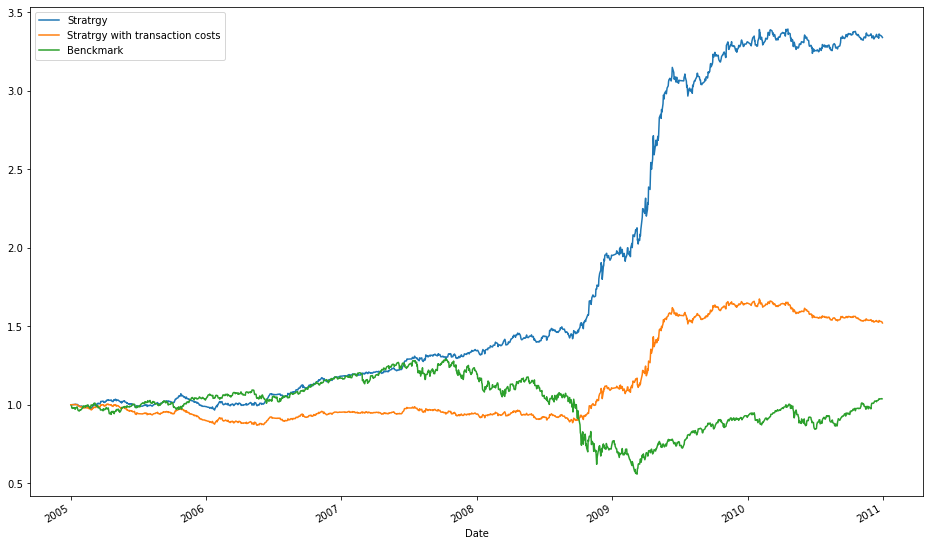

In [7]:
# Plotting results
total_returns.plot(figsize=(16, 10), label = "Stratrgy")
total_returns_with_costs.plot(label = "Stratrgy with transaction costs")
(SP500.pct_change() + 1).cumprod().plot(label = "Benckmark")
plt.legend()
plt.show()

## Live Trading Example

If users want to actually use this strategy for a live trading, they can use the following method to complete. It mainly consists of two steps. The first step is to transmit the latest price to the object, and the second step is to obtain the latest signal.

In [8]:
# Loading data
data =  yf.download("KO PEP", start="2020-01-01", end="2021-07-01")["Adj Close"]

# Constructing spread series
series = np.log(data["KO"]) - np.log(data["PEP"])

# Splitting the series for demonstation
historical_series = series[:-1]
threshold = historical_series.std()
latest_data = series[-1:]
print(latest_data)

[*********************100%***********************]  2 of 2 completed
Date
2021-06-30   -1.007341
dtype: float64


In [9]:
# Creating a class object
hc = HConstruction(historical_series, threshold, "Renko")

# Transmiting the latest price to the object
hc.extend_series(latest_data)

# Getting the latest signal
print("Latest Signal:")
display(hc.get_signals()[-1:])

Latest Signal:


Date
2021-06-30    0.0
dtype: float64

## Conclusion

This notebook demonstrated a nonparametric approach to pairs trading based on the idea of Renko and Kagi charts, which is very different from the traditional one.

Key takeaways from the notebook:
- H-inversion statistic that capture the degree of mean reversion.
- H-volatility statistic that measures the variability of the process.
- A new way to select pairs and generate trading signals for statistical arbitrage strategies.

## References

1. [Pairs trading based on statistical variability of the spread process. Bogomolov, T. (2013).](https://www.researchgate.net/publication/263339291_Pairs_trading_based_on_statistical_variability_of_the_spread_process)